In [ ]:
# import pandas as pd
# import glob
# import os

# # =========================
# # 0. 경로 설정
# # =========================
# DATA_DIR = "../food"
# csv_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

# print(f"총 파일 수: {len(csv_files)}")

# # =========================
# # 1. 연령대 매핑 함수
# # =========================
# def age_bucket(code):
#     if code == 3:
#         return "20대"
#     elif code == 4:
#         return "30대"
#     elif code == 5:
#         return "40대"
#     elif code in [1, 2]:
#         return "10대이하"
#     else:
#         return "50대+"

# # =========================
# # 2. 전처리 함수
# # =========================
# def preprocess_chunk(chunk):
#     chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]
#     chunk["age_group"] = chunk["age"].apply(age_bucket)
#     return chunk

# # =========================
# # 3. 전체 CSV 순회 + 집계
# # =========================
# records = []

# USECOLS = ["ta_ymd", "age", "card_tpbuz_nm_2", "amt"]

# for file in csv_files:
#     print(f"Processing: {os.path.basename(file)}")

#     for chunk in pd.read_csv(
#         file,
#         usecols=USECOLS,
#         chunksize=200_000
#     ):
#         chunk = preprocess_chunk(chunk)

#         grouped = (
#             chunk
#             .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
#             .sum()
#             .reset_index()
#         )

#         records.append(grouped)

# # =========================
# # 4. 최종 통합 데이터
# # =========================
# df_final = (
#     pd.concat(records)
#     .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
#     .sum()
#     .reset_index()
# )

# print("완료")
# print(df_final.head())
# print(f"최종 row 수: {len(df_final)}")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
from collections import defaultdict
import pandas as pd
import glob
import os

DATA_DIR = "../food"
csv_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

agg_result = defaultdict(int)

def age_bucket(code):
    if code == 2:
        return "20대"
    elif code == 3:
        return "30대"
    elif code == 4:
        return "40대"
    elif code == 5:
        return "50대"
    elif code == 6:
        return "60대+"

for file in csv_files:
    print(f"Processing: {os.path.basename(file)}")

    for chunk in pd.read_csv(
        file,
        usecols=["ta_ymd", "age", "card_tpbuz_nm_2", "amt"],
        chunksize=200_000
    ):
        chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]
        chunk["age_group"] = chunk["age"].apply(age_bucket)

        s = (
            chunk
            .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
            .sum()
        )

        for k, v in s.items():
            agg_result[k] += v

Processing: 202201.csv
Processing: 202202.csv
Processing: 202203.csv
Processing: 202204.csv
Processing: 202205.csv
Processing: 202206.csv
Processing: 202207.csv
Processing: 202208.csv
Processing: 202209.csv
Processing: 202210.csv
Processing: 202211.csv
Processing: 202212.csv
Processing: 202301.csv
Processing: 202302.csv
Processing: 202303.csv
Processing: 202304.csv
Processing: 202305.csv
Processing: 202306.csv
Processing: 202307.csv
Processing: 202308.csv
Processing: 202309.csv
Processing: 202310.csv
Processing: 202311.csv
Processing: 202312.csv
Processing: 202401.csv
Processing: 202402.csv
Processing: 202403.csv
Processing: 202404.csv
Processing: 202405.csv
Processing: 202406.csv
Processing: 202407.csv
Processing: 202408.csv
Processing: 202409.csv
Processing: 202410.csv
Processing: 202411.csv
Processing: 202412.csv
Processing: 202501.csv
Processing: 202502.csv
Processing: 202503.csv
Processing: 202504.csv
Processing: 202505.csv
Processing: 202506.csv
Processing: 202507.csv
Processing:

In [4]:
df_final = (
    pd.Series(agg_result)
    .reset_index()
    .rename(columns={
        "level_0": "month",
        "level_1": "age_group",
        "level_2": "card_tpbuz_nm_2",
        0: "amt"
    })
)

In [5]:
df_final

,month,age_group,card_tpbuz_nm_2,amt
0,202201,20대,간이주점,6588480320
1,202201,20대,고기요리,17114820563
2,202201,20대,디저트/음료,17948027287
3,202201,20대,별식/퓨전요리,2656842128
4,202201,20대,분식,4404654742
...,...,...,...,...
2345,202511,60대+,양식,2547276433
2346,202511,60대+,일식/수산물,21114966098
2347,202511,60대+,중식,4989250348
2348,202511,60대+,패스트푸드,3898958239


In [6]:
import os

OUTPUT_DIR = "../output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_age_out = df_final.copy()

df_age_out.to_csv(
    f"{OUTPUT_DIR}/age_category_summary_202201_202511.csv",
    index=False,
    encoding="utf-8-sig"
)


In [7]:
pivot = (
    df_final
    .groupby(["age_group", "card_tpbuz_nm_2"])["amt"]
    .sum()
    .unstack(fill_value=0)
)

pivot

card_tpbuz_nm_2,간이주점,고기요리,디저트/음료,별식/퓨전요리,분식,양식,일식/수산물,중식,패스트푸드,한식
age_group,,,,,,,,,,
20대,501521252594,869421400616,917596420597,180174898296,238207073709,150796048607,345261467513,161916080187,317379291691,1441577356225
30대,535080560999,1442153608187,1549172433789,327759671646,419686113609,269078655207,675506963814,303670913210,437349883166,2634023478596
40대,547675290555,1986244033970,1936389273744,448697260960,651233180674,322025071935,975948903055,438516521340,527575846710,3600854244750
50대,401763025103,1871733891115,1541531007689,430816081373,574016274839,204196140401,1090615821155,357824289021,364866986810,3681834124361
60대+,159758020777,1223624443873,957276123075,306596711456,368629472213,100680856450,889662988756,212202151431,155992428624,2837326985519


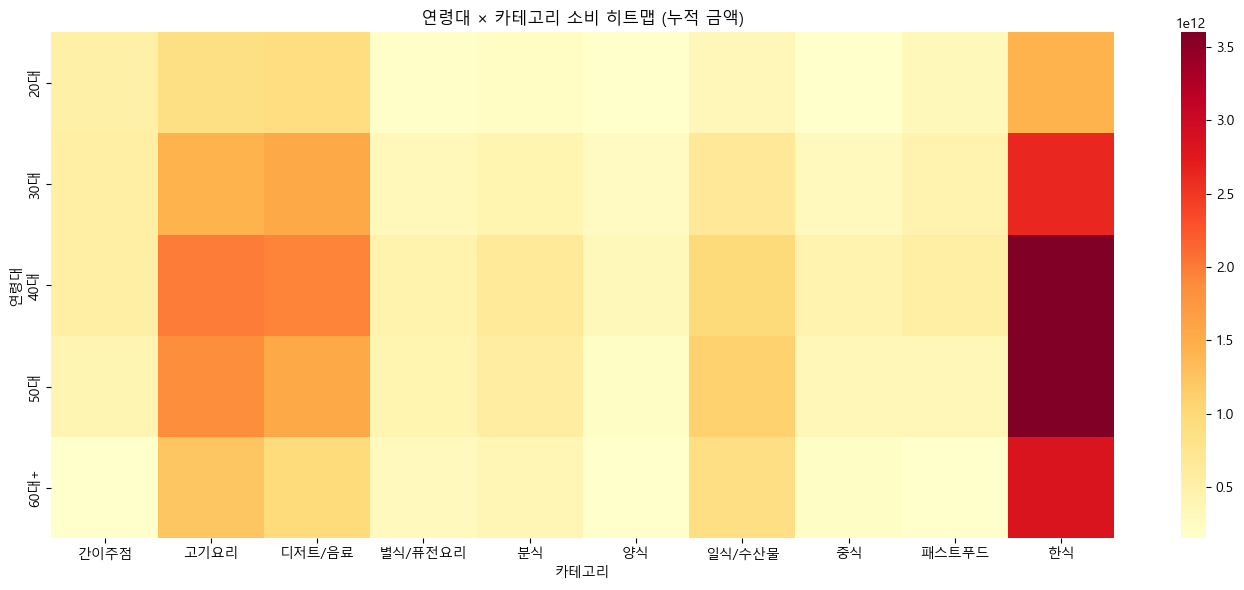

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 누적 집계
pivot_amt = (
    df_final
    .groupby(["age_group", "card_tpbuz_nm_2"])["amt"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_amt,
    cmap="YlOrRd",
    robust=True
)

plt.title("연령대 × 카테고리 소비 히트맵 (누적 금액)")
plt.xlabel("카테고리")
plt.ylabel("연령대")
plt.tight_layout()
plt.show()


In [12]:
pivot_z = pivot_amt.sub(pivot_amt.mean(axis=1), axis=0) \
                   .div(pivot_amt.std(axis=1), axis=0)                 
pivot_z

card_tpbuz_nm_2,간이주점,고기요리,디저트/음료,별식/퓨전요리,분식,양식,일식/수산물,중식,패스트푸드,한식
age_group,,,,,,,,,,
20대,-0.025294,0.831277,0.943442,-0.773475,-0.638361,-0.841877,-0.389109,-0.815987,-0.454026,2.163411
30대,-0.418043,0.751348,0.889316,-0.685320,-0.566809,-0.760971,-0.237007,-0.716375,-0.544037,2.287898
40대,-0.564226,0.798014,0.750805,-0.657953,-0.466163,-0.777904,-0.158676,-0.667593,-0.583259,2.326955
50대,-0.600811,0.757592,0.452451,-0.573963,-0.441632,-0.783383,0.035759,-0.641415,-0.634907,2.430310
60대+,-0.666304,0.596319,0.280211,-0.492032,-0.418410,-0.736418,0.199966,-0.604062,-0.670773,2.511501


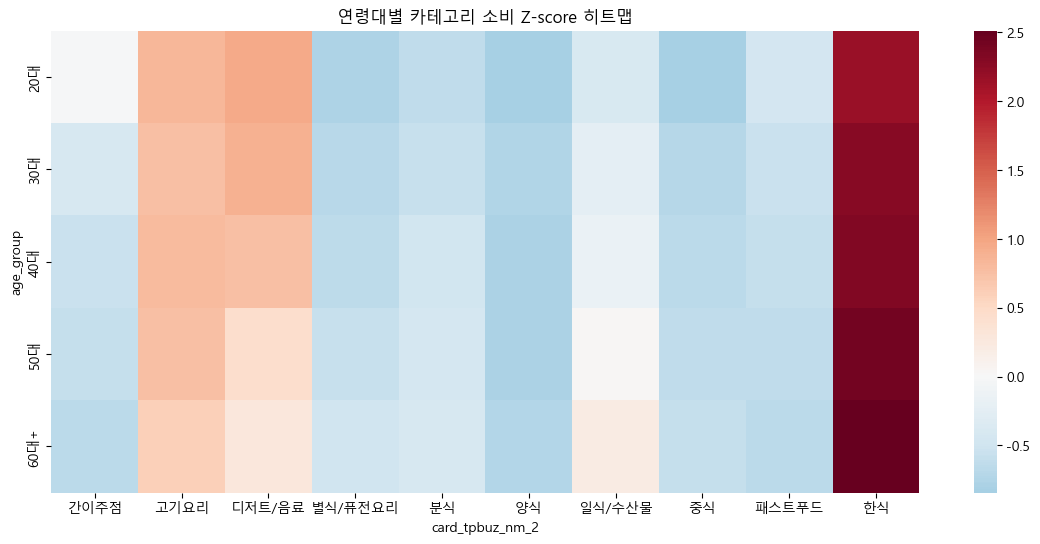

In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_z,
    cmap="RdBu_r",
    center=0
)

plt.title("연령대별 카테고리 소비 Z-score 히트맵")
plt.show()

In [14]:
pivot_z_clipped = pivot_z.clip(-2, 2)
pivot_z_clipped

card_tpbuz_nm_2,간이주점,고기요리,디저트/음료,별식/퓨전요리,분식,양식,일식/수산물,중식,패스트푸드,한식
age_group,,,,,,,,,,
20대,-0.025294,0.831277,0.943442,-0.773475,-0.638361,-0.841877,-0.389109,-0.815987,-0.454026,2.0
30대,-0.418043,0.751348,0.889316,-0.685320,-0.566809,-0.760971,-0.237007,-0.716375,-0.544037,2.0
40대,-0.564226,0.798014,0.750805,-0.657953,-0.466163,-0.777904,-0.158676,-0.667593,-0.583259,2.0
50대,-0.600811,0.757592,0.452451,-0.573963,-0.441632,-0.783383,0.035759,-0.641415,-0.634907,2.0
60대+,-0.666304,0.596319,0.280211,-0.492032,-0.418410,-0.736418,0.199966,-0.604062,-0.670773,2.0


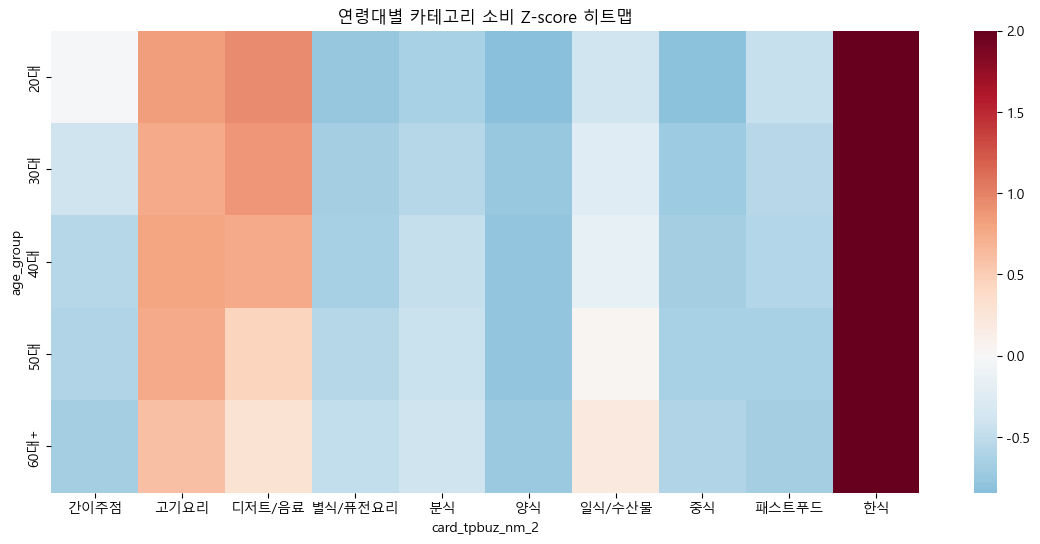

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_z_clipped,
    cmap="RdBu_r",
    center=0
)

plt.title("연령대별 카테고리 소비 Z-score 히트맵")
plt.show()

In [16]:
TOP_N = 3

top_trend = (
    pivot_z_clipped
    .apply(lambda row: row.nlargest(TOP_N).index.tolist(), axis=1)
)

top_trend

age_group
20대     [한식, 디저트/음료, 고기요리]
30대     [한식, 디저트/음료, 고기요리]
40대     [한식, 고기요리, 디저트/음료]
50대     [한식, 고기요리, 디저트/음료]
60대+    [한식, 고기요리, 디저트/음료]
dtype: object